In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

root_folder = r"C:\Users\Zirconix"
data_folder = "Desktop"
# root_folder = r"E:\results\cell-sim-1600000-8000000\0.010\soft0-rho90"
# data_folder = "data"


root_path = Path(root_folder) / data_folder
print(root_path.resolve())

C:\Users\Zirconix\Desktop


In [20]:
field_data_file_name = "data_{index}_{step:09d}.txt"
checkpoint_data_file_name = "data{index}_{step:07d}"

In [6]:
# load data
selected_step = 1600000
data_system_ids = [0]
data = [None] * len(data_system_ids)
for i, index in enumerate(data_system_ids):

    file_path = root_path / field_data_file_name.format(index=index, step=selected_step)

    if file_path.exists():
        data_raw = np.loadtxt(file_path)
        frame_starts, = np.where(data_raw[:,0] == 0)

        if (len(frame_starts) > 1):
            delta = frame_starts[1] - frame_starts[0]
        else:
            delta = len(data_raw)
        frames = frame_starts.size

        x = data_raw[0, 1:]
        y = data_raw[1:delta, 0]
        # X, Y = np.meshgrid(x, y)

        picked_frame = 0
        data[i] = (x, y, data_raw[(picked_frame) * delta + 1:(picked_frame + 1) * delta, 1:])
        
    else:
        print(f"phase-field data is not available under {file_path.resolve()}")


In [35]:
# load checkpoint
selected_step = 100
data_system_ids = [0]
data = [None] * len(data_system_ids)
for i, index in enumerate(data_system_ids):

    file_path = root_path / checkpoint_data_file_name.format(index=index, step=selected_step)

    if file_path.exists():
        with open(file_path, 'r') as f:
            data_raw = np.array([np.array([*map(float, line.split())]) for line in f.readlines()[1:] ])
        x, y = data_raw.shape
        data[i] = (np.arange(0, x), np.arange(0, y), data_raw)
        
    else:
        print(f"phase-field data is not available under {file_path.resolve()}")
        
print(data_raw)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


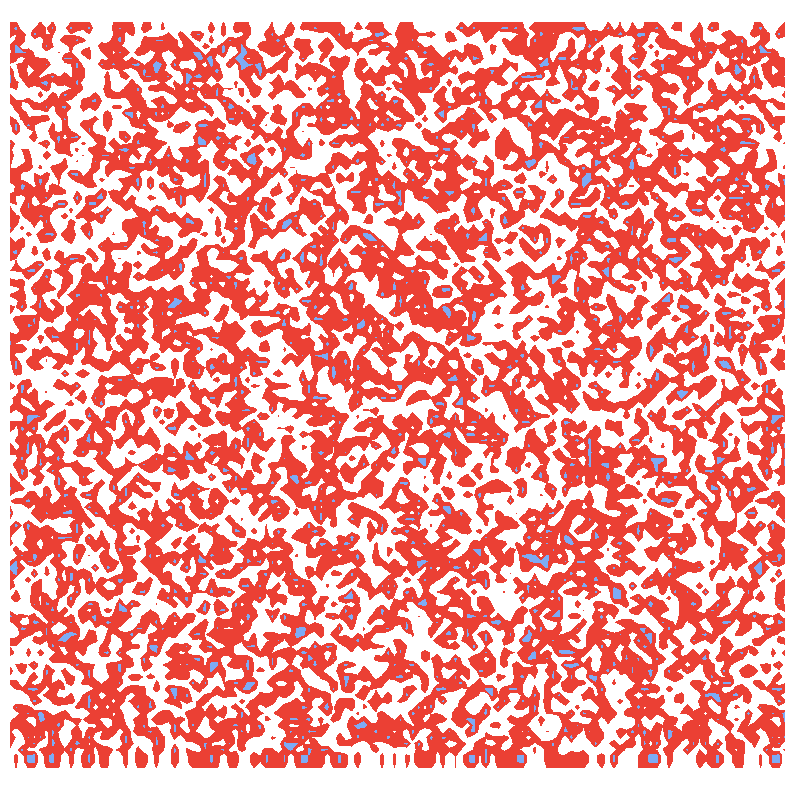

In [38]:
# x = np.linspace(0, s0)
# y = np.linspace(0, s1)

# problem in cell 127 of 03.15

colors = ["#eb4034", "#7dabf5"]
levels = [0, .8, 2]

for (x, y, d) in data:
    extent = [x[0], x[-1], y[0], y[-1]]
    
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([y[0], y[-1]])
    im0 = ax.contourf(d, extent=extent, colors=colors, levels=levels)

    ax.axis("off")
    fig.savefig("plot.svg", format="svg", bbox_inches="tight")